<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

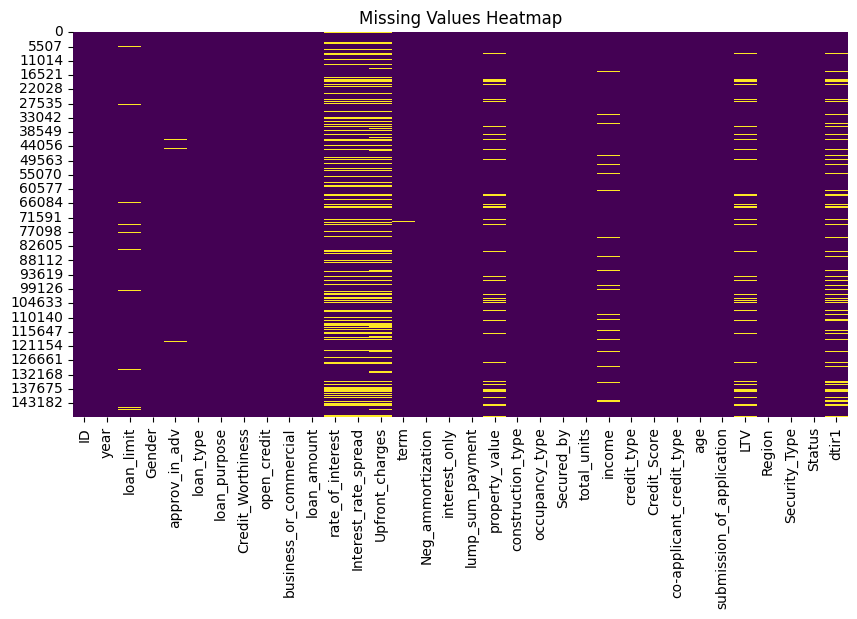

Removed 0 duplicate rows.

 Categorical Columns: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
Numerical Columns: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']

Target Column: Status


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15592\1944708243.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_col], palette='Set2')


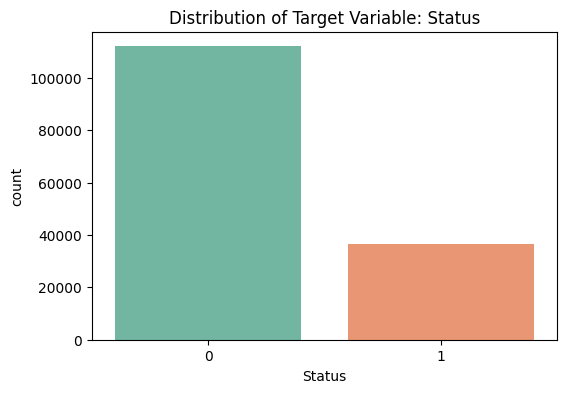

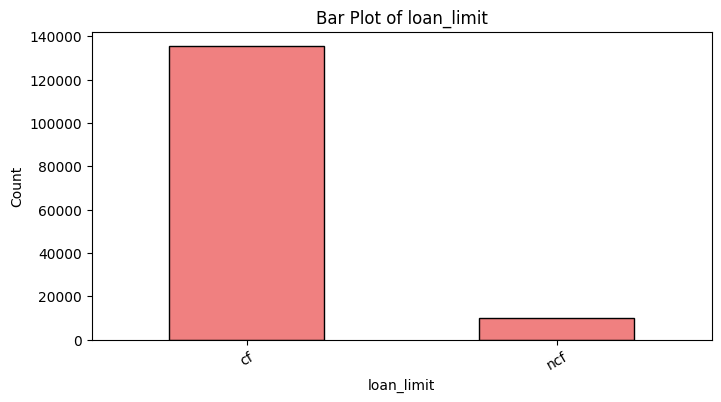

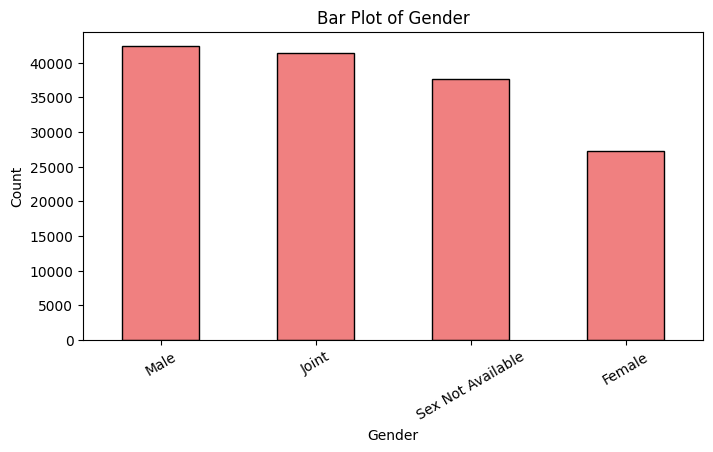

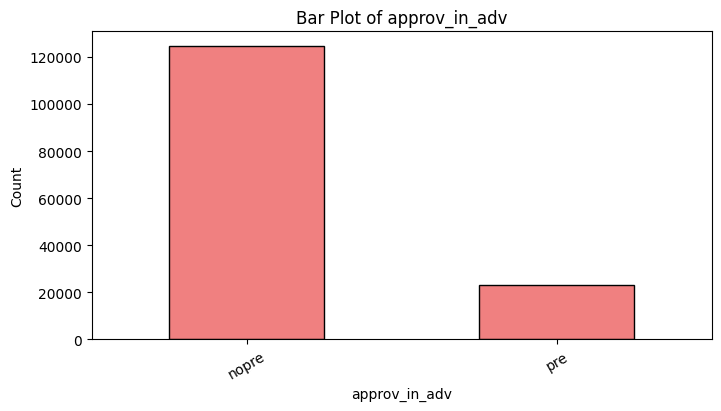

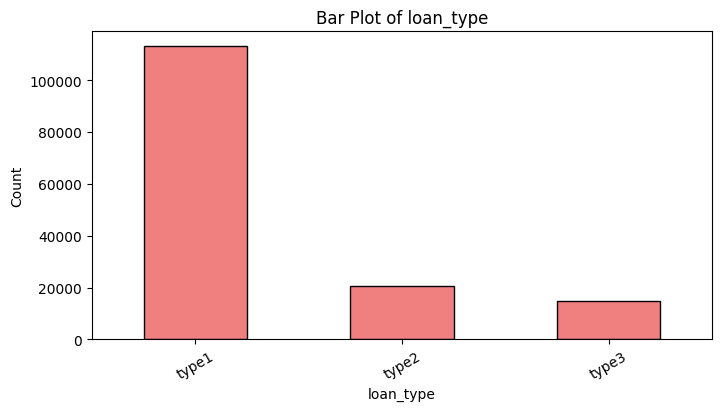

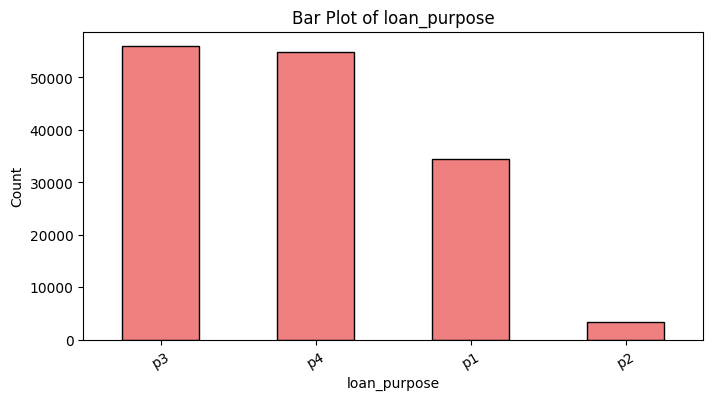

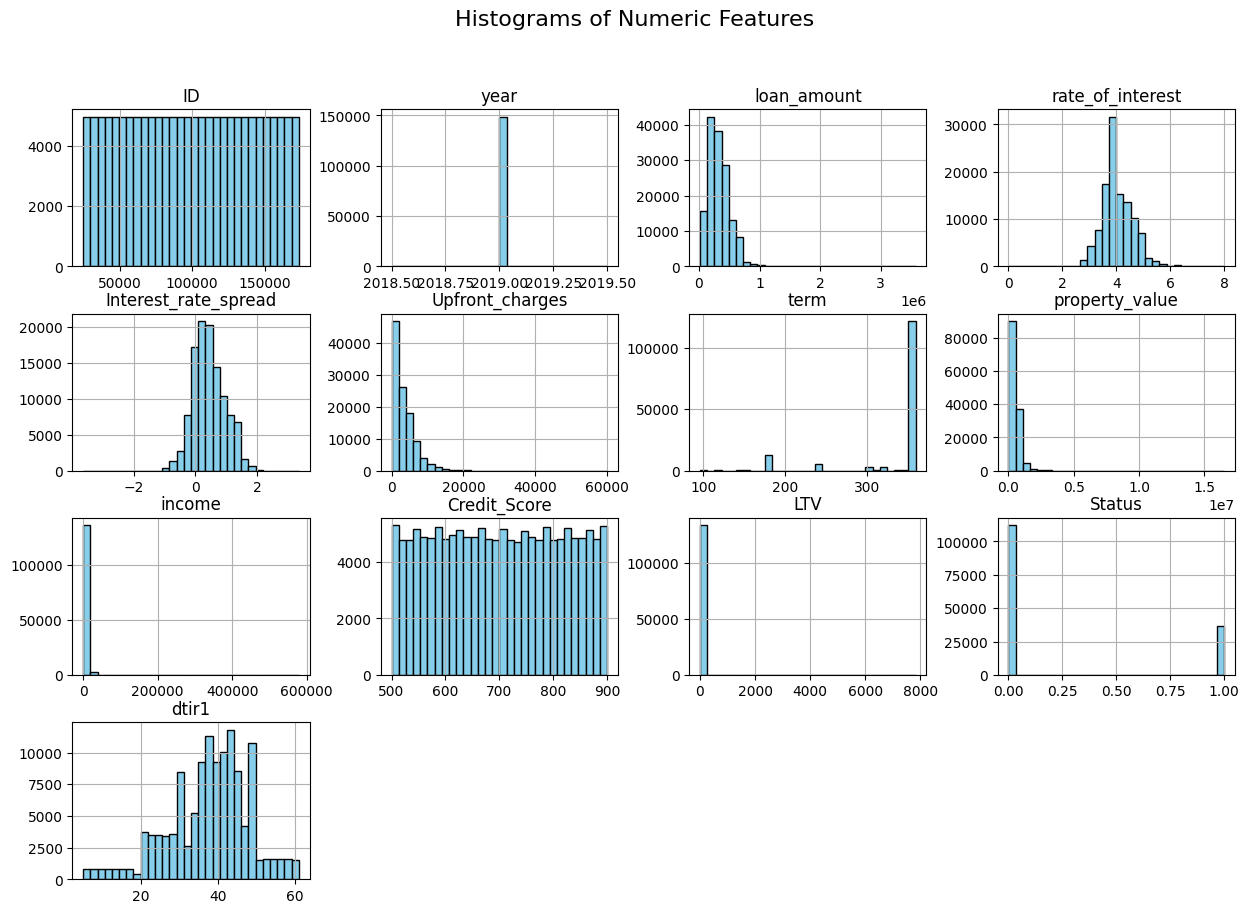

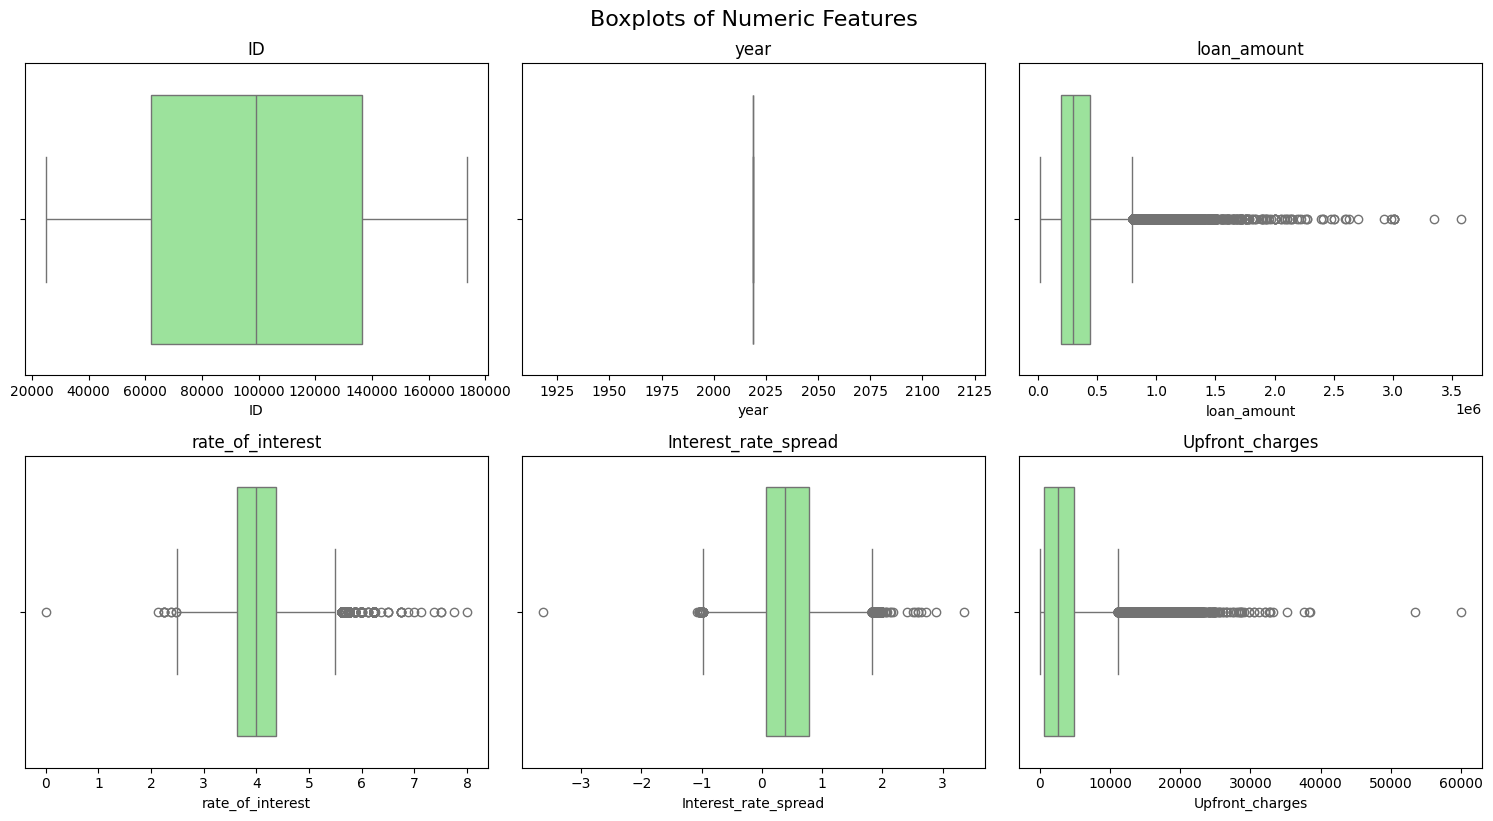

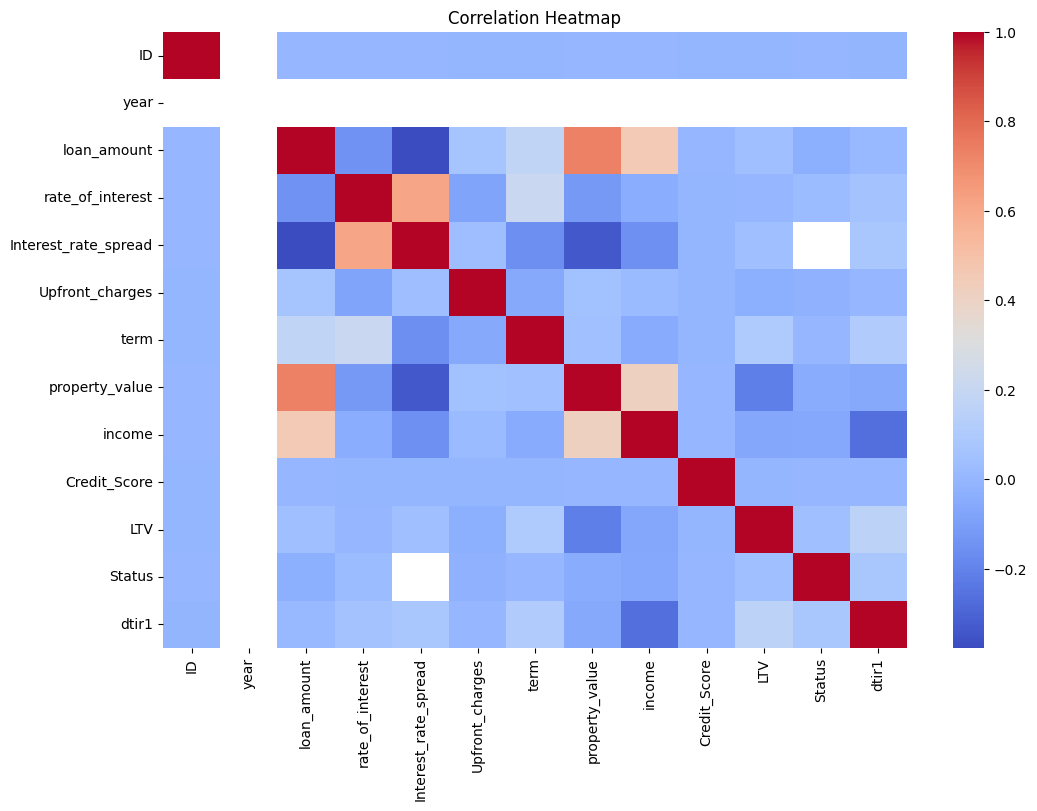

c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

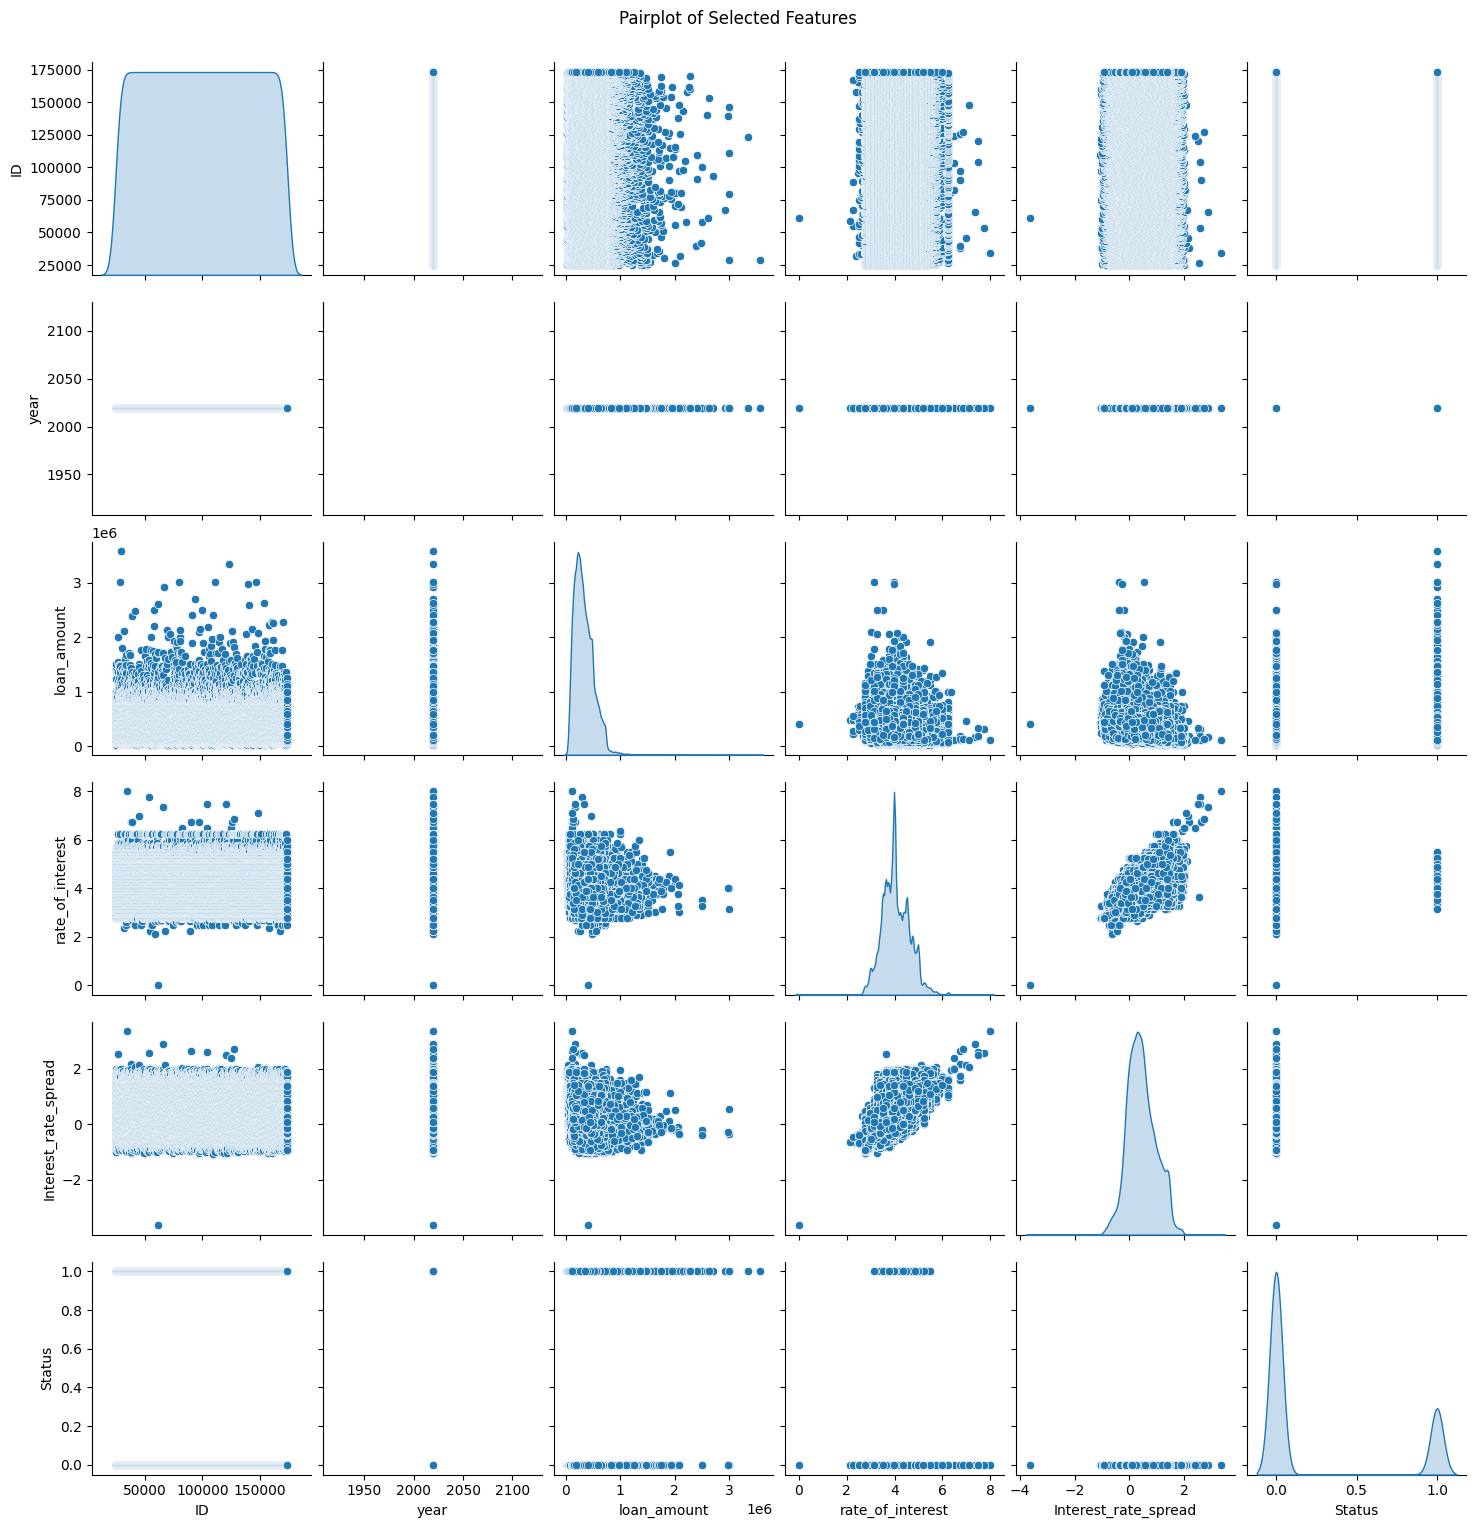

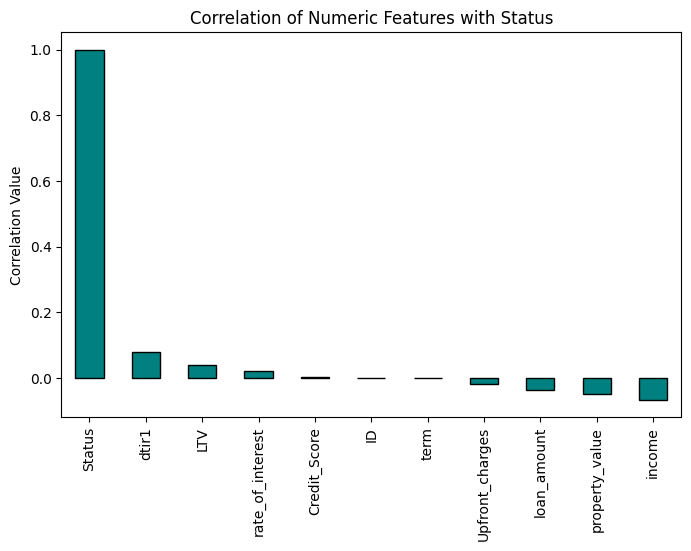


 EDA completed successfully!


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv('data/loan_Default.csv')

#exploring the dataset
print(df.info())
print(df.describe())
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns.tolist())

#finding missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Detect Categorical and Numerical Columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

target_col = 'Status'   
if target_col not in df.columns:
    print("\nTarget column not found — please update 'target_col' name!")
else:
    print(f"\nTarget Column: {target_col}")


# Distribution of Target Variable
if target_col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[target_col], palette='Set2')
    plt.title(f"Distribution of Target Variable: {target_col}")
    plt.show()


# Bar Plots for Categorical Columns
for col in cat_cols[:5]:  # limit to 5 for readability
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()

# Histograms for Numerical Columns
df[num_cols].hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols[:6], 1):  # display first 6
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features", y=1.02, fontsize=16)
plt.show()


# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Pairplot (sample columns)
sample_cols = num_cols[:5]
if target_col in df.columns:
    sample_cols.append(target_col)

sns.pairplot(df[sample_cols], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


# Correlation of Features with Target
if target_col in df.columns:
    target_corr = corr[target_col].dropna().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    target_corr.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f"Correlation of Numeric Features with {target_col}")
    plt.ylabel("Correlation Value")
    plt.show()

print("\n EDA completed successfully!")